### New image created with a random magnitude and preserving the phase

In [4]:
from __future__ import division
import numpy as np                          
import matplotlib.pyplot as plt             
from PIL import Image                      
from numpy.fft import fft2, fftshift, ifft2
import cv2

In [5]:
!wget https://wallpaperstock.net/concha%2C-arena%2C-cielo%2C-fotograf%C3%ADa.-wallpapers_57032_1920x1200.jpg
!mv concha,-arena,-cielo,-fotografía.-wallpapers_57032_1920x1200.jpg caracol.jpg

--2021-03-24 15:00:25--  https://wallpaperstock.net/concha%2C-arena%2C-cielo%2C-fotograf%C3%ADa.-wallpapers_57032_1920x1200.jpg
Resolving wallpaperstock.net (wallpaperstock.net)... 159.65.101.137
Connecting to wallpaperstock.net (wallpaperstock.net)|159.65.101.137|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 277550 (271K) [application/force-download]
Saving to: ‘concha,-arena,-cielo,-fotografía.-wallpapers_57032_1920x1200.jpg’

concha,-arena,-ciel 100%[===================>] 271.04K  --.-KB/s    in 0.08s   

2021-03-24 15:00:25 (3.36 MB/s) - ‘concha,-arena,-cielo,-fotografía.-wallpapers_57032_1920x1200.jpg’ saved [277550/277550]



In [7]:
text=cv2.cvtColor(cv2.imread('caracol.jpg'), cv2.COLOR_RGB2BGR)

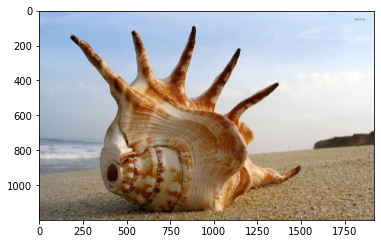

In [8]:
plt.imshow(text)

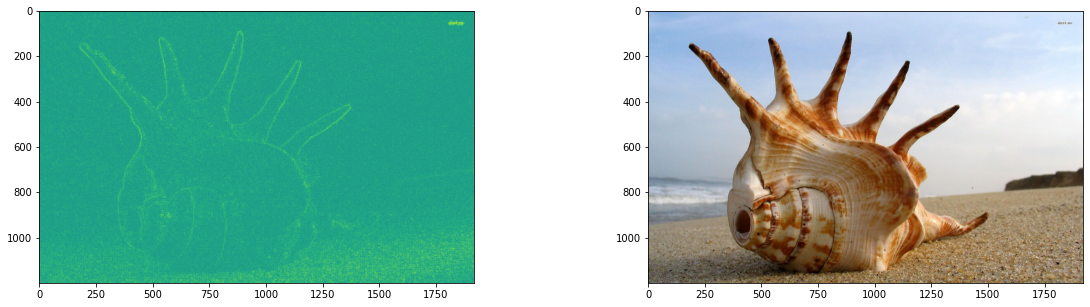

In [17]:
F=fft2(cv2.cvtColor(text, cv2.COLOR_RGB2GRAY))
Mod=np.abs(F)
Mod=np.random.rand(np.shape(Mod)[0], np.shape(Mod)[1])
fas=np.arctan(F.imag/F.real)
pi_n=-np.logical_and(F.imag<0,F.real<0).astype('int')*np.pi
pi_p=np.logical_and(F.imag>0,F.real<0).astype('int')*np.pi
fas=fas+pi_n+pi_p

F2=(Mod*np.cos(fas)+Mod*np.sin(fas)*1j)

inv=ifft2(F2)
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.imshow(np.abs(inv)**0.05)
plt.subplot(1,2,2)
plt.imshow(text)
plt.savefig(str(i)+'2imag.svg')

(391789627+0j) (245453759.05545586+0j)
(373051904+0j) (263316610.96677685+0j)
(357088803+0j) (241644893.77298927+0j)


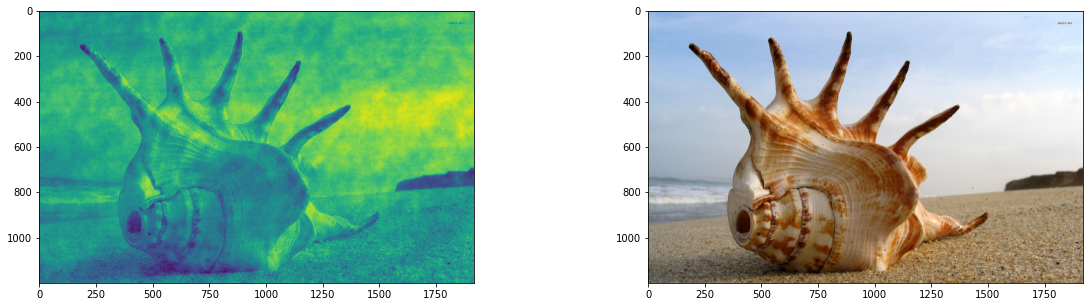

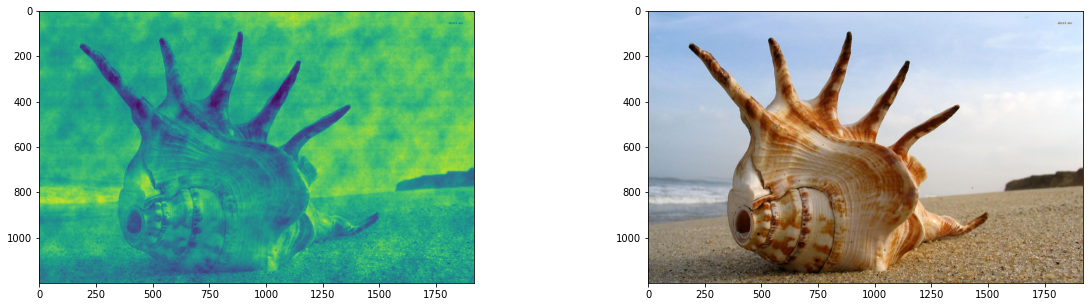

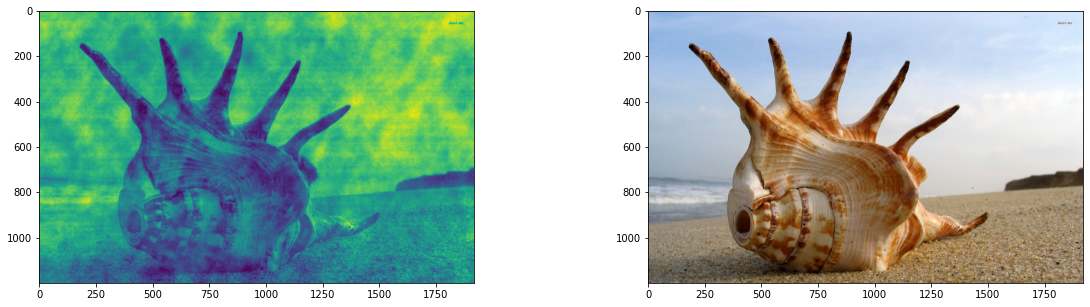

In [13]:
for i in range(3):
  F=fft2(text[...,i])
  Mod=np.abs(F)
  Mod=Mod*np.random.rand(np.shape(Mod)[0], np.shape(Mod)[1])
  fas=np.arctan(F.imag/F.real)
  pi_n=-np.logical_and(F.imag<0,F.real<0).astype('int')*np.pi
  pi_p=np.logical_and(F.imag>0,F.real<0).astype('int')*np.pi
  fas=fas+pi_n+pi_p

  F2=(Mod*np.cos(fas)+Mod*np.sin(fas)*1j)
  print(F[0,0], F2[0,0])

  inv=ifft2(F2)
  plt.figure(figsize=(20,5))
  plt.subplot(1,2,1)
  plt.imshow(np.abs(inv))
  plt.subplot(1,2,2)
  plt.imshow(text)